## Table of Contents

### 1. Importing libraries and data
### 2. Security implications
### 3. Regional segmentation
##### 1. Create new 'region' column
##### 2. Compare spending habits between regions
### 4. Create exclusion flag for low-activity customers
### 5. Create customer profiles
##### 1. Creating data dictionary for department_id
##### 2. Creating a young parent profile
##### 3. Creating a single adult profile
##### 4. Creating a bulk buyer profile
##### 5. Creating a well-off retiree profile
##### 6. Creating a middle-class parent profile
##### 7. Creating a DINK (dual-income, no kids) profile
### 6. Creating a visualization based on profiles
### 7. Aggregate variables on customer profile level
##### 1. Aggregate variables for usage frequency
##### 2. Aggregate variables for expenditure
### 8. Compare customer profiles across regions and departments
##### 1. Compare customer profiles across regions
##### 2. Compare customer profiles across departments
### 9. Determine which region has more loyal customers/high spenders/frequent customers
### 10. Export final data set

# 01. Importing libraries and data

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Create path shortcut
path = r'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/Instacart Basket Analysis'

In [3]:
# Check output
path

'/Users/taraperrigeold/Documents/Documents - Tara Perrige’s MacBook Pro/CareerFoundry/Instacart Basket Analysis'

In [4]:
# Import orders_products_customers_merged.pkl
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_customers_merged.pkl'))

In [5]:
# Check output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [6]:
# Change options to display all columns
pd.options.display.max_columns = None

In [7]:
# Check output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both


In [8]:
# Check shape
df.shape

(32404859, 32)

# 02. Security implications

This data set contains personally identifiable information (PII), specifically first name and last name in combination with gender, state, age, number of dependents, family status and income. Any results that are communicated to stakeholders should definitely not include information about first name or last name, as well as any information about specific customers with all of the listed columns (gender, state, age, number of dependents, family status, income) in combination. It would also be possible to drop (or "scrub") the columns that contain first name and last name from the data set due to their sensitive nature, since they're not useful for the analysis.

For this project, I will ignore the first name and last name columns and make sure any analysis that includes gender, state, age, number of dependents, family status, or income is sufficiently general enough that it can't be traced back to any specific customers.

# 03. Regional segmentation

## 01. Create new 'region' column

In [9]:
# Check frequency of state column, also to check how differents states are spelled for consistency
df['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [10]:
# Create list northeast
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']

In [11]:
# Check output
northeast

['Maine',
 'New Hampshire',
 'Vermont',
 'Massachusetts',
 'Rhode Island',
 'Connecticut',
 'New York',
 'Pennsylvania',
 'New Jersey']

In [12]:
# Create list midwest
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']

In [13]:
# Check output
midwest

['Wisconsin',
 'Michigan',
 'Illinois',
 'Indiana',
 'Ohio',
 'North Dakota',
 'South Dakota',
 'Nebraska',
 'Kansas',
 'Minnesota',
 'Iowa',
 'Missouri']

In [14]:
# Create south list
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']

In [15]:
# Check output
south

['Delaware',
 'Maryland',
 'District of Columbia',
 'Virginia',
 'West Virginia',
 'North Carolina',
 'South Carolina',
 'Georgia',
 'Florida',
 'Kentucky',
 'Tennessee',
 'Mississippi',
 'Alabama',
 'Oklahoma',
 'Texas',
 'Arkansas',
 'Louisiana']

In [16]:
# Create west list
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [17]:
# Check output
west

['Idaho',
 'Montana',
 'Wyoming',
 'Nevada',
 'Utah',
 'Colorado',
 'Arizona',
 'New Mexico',
 'Alaska',
 'Washington',
 'Oregon',
 'California',
 'Hawaii']

In [18]:
# Create new column region where output is 'South' if state is in list south
df.loc[df['state'].isin(south), 'region'] = 'South'

In [19]:
# Check output
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South


In [20]:
# Create new column region where output is 'Northeast' if state is in list northeast
df.loc[df['state'].isin(northeast), 'region'] = 'Northeast'

In [21]:
# Create new column region where output is 'Midwest' if state is in list midwest
df.loc[df['state'].isin(midwest), 'region'] = 'Midwest'

In [22]:
# Create new column region where output is 'West' if state is in list west
df.loc[df['state'].isin(west), 'region'] = 'West'

In [23]:
# Check frequency of region column
df['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [24]:
# Check tail of df
df.tail(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region
32404844,1987169,106143,16,6,21,6.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404845,3143166,106143,17,0,8,15.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Busiest day,Busiest days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404846,3094081,106143,18,4,17,11.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy days,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404847,405982,106143,19,3,18,6.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Least busy days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404848,3102310,106143,20,3,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Least busy days,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404849,1539810,106143,21,1,18,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Busiest days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy days,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.7,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West


## 02. Compare spending habits between regions

In [26]:
# Count user_id unique values, group by region and then spending flag
df.groupby(['region', 'spending_flag'])['user_id'].nunique()

region     spending_flag
Midwest    High spender       798
           Low spender      47721
Northeast  High spender       544
           Low spender      35844
South      High spender      1140
           Low spender      67597
West       High spender       901
           Low spender      51664
Name: user_id, dtype: int64

In [27]:
# Calculate proportion of high spenders in the Midwest
798/ (798 + 47721)

0.016447165028133308

In [28]:
# Calculate proportion of high spenders in the Northeast
544 / (544 + 35844)

0.014949983511047598

In [29]:
# Calculate proportion of high spenders in the South
1140 / (1140 + 67597)

0.01658495424589377

In [30]:
# Calculate proportion of high spenders in the West
901 / (901 + 51664)

0.017140682963949397

The West region has a slightly higher percentage of high spenders at 1.7% of all customers, compared to the other regions where high spenders make up around 1.4-1.6% of all customers.

# 04. Create exclusion flag for low-activity customers

In [31]:
# Create a low-activity flag for low-activity customers (less than 5 orders)
df.loc[df['max_order'] < 5, 'low_activity_flag'] = 'Low-activity customer'

In [32]:
# Create a low-activity flag for non-low-activity customers
df.loc[df['max_order'] >= 5, 'low_activity_flag'] = 'Non-low-activity customer'

In [33]:
# Check frequency of low-activity flag column
df['low_activity_flag'].value_counts(dropna = False)

Non-low-activity customer    30964564
Low-activity customer         1440295
Name: low_activity_flag, dtype: int64

In [34]:
# Check output, returning first 50 rows of only user_id, order_number, low_activity_flag, and max_order
df[['user_id', 'order_number', 'low_activity_flag', 'max_order']].head(50)

,user_id,order_number,low_activity_flag,max_order
0,1,1,Non-low-activity customer,10
1,1,2,Non-low-activity customer,10
2,1,3,Non-low-activity customer,10
3,1,4,Non-low-activity customer,10
4,1,5,Non-low-activity customer,10
5,1,6,Non-low-activity customer,10
6,1,7,Non-low-activity customer,10
7,1,8,Non-low-activity customer,10
8,1,9,Non-low-activity customer,10
9,1,10,Non-low-activity customer,10


In [35]:
# Check output, returning last 50 rows of only user_id, low_activity_flag, and max_order
df[['user_id', 'order_number', 'low_activity_flag', 'max_order']].tail(50)

,user_id,order_number,low_activity_flag,max_order
32404809,11534,12,Non-low-activity customer,12
32404810,105857,1,Non-low-activity customer,6
32404811,105857,2,Non-low-activity customer,6
32404812,105857,3,Non-low-activity customer,6
32404813,105857,4,Non-low-activity customer,6
32404814,105857,5,Non-low-activity customer,6
32404815,105857,6,Non-low-activity customer,6
32404816,38979,1,Low-activity customer,3
32404817,38979,2,Low-activity customer,3
32404818,38979,3,Low-activity customer,3


In [36]:
# Create new dataframe from df with only low-activity customers
df_low_activity = df.loc[df['low_activity_flag'] == 'Low-activity customer']

In [37]:
# Check output
df_low_activity.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag
1510,520620,120,1,3,11,NaN,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,2,married,99219,both,South,Low-activity customer
1511,3273029,120,3,2,8,19.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,2,married,99219,both,South,Low-activity customer
1512,520620,120,1,3,11,NaN,46149,1,0,Zero Calorie Cola,77,7,13.4,Mid-range product,Regularly busy,Least busy days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,2,married,99219,both,South,Low-activity customer
1513,3273029,120,3,2,8,19.0,46149,1,1,Zero Calorie Cola,77,7,13.4,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,2,married,99219,both,South,Low-activity customer
1514,520620,120,1,3,11,NaN,26348,3,0,Mixed Fruit Fruit Snacks,50,19,3.1,Low-range product,Regularly busy,Least busy days,Most orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,2,married,99219,both,South,Low-activity customer
1515,906054,120,2,4,7,15.0,31102,1,0,Sugar Free Energy Drink,64,7,8.9,Mid-range product,Least busy,Least busy days,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,2,married,99219,both,South,Low-activity customer
1516,3273029,120,3,2,8,19.0,31102,3,1,Sugar Free Energy Drink,64,7,8.9,Mid-range product,Regularly busy,Regularly busy,Average orders,3,New customer,9.385714,Low spender,19.0,Regular customer,Sarah,Rich,Female,Kentucky,54,2,married,99219,both,South,Low-activity customer
3855,3226575,360,1,5,12,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,3,New customer,10.006250,High spender,4.0,Frequent customer,Phyllis,Greene,Male,Arizona,46,1,married,104257,both,West,Low-activity customer
3856,3046940,360,2,2,8,4.0,5322,3,0,Gluten Free Dark Chocolate Chunk Chewy with a ...,3,19,2.9,Low-range product,Regularly busy,Regularly busy,Average orders,3,New customer,10.006250,High spender,4.0,Frequent customer,Phyllis,Greene,Male,Arizona,46,1,married,104257,both,West,Low-activity customer
3857,2300993,360,3,1,13,6.0,5322,2,1,Gluten Free Dark Chocolate Chunk Chewy with a ...,3,19,2.9,Low-range product,Regularly busy,Busiest days,Most orders,3,New customer,10.006250,High spender,4.0,Frequent customer,Phyllis,Greene,Male,Arizona,46,1,married,104257,both,West,Low-activity customer


In [38]:
# Check shape to compare with frequency calculated above
df_low_activity.shape

(1440295, 34)

In [39]:
# Export low-activity customers dataset
df_low_activity.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'low_activity_customers.pkl'))

In [40]:
# Create new dataframe from df that excludes low-activity-customers to be used for rest of analysis
df_non_low = df.loc[df['low_activity_flag'] == 'Non-low-activity customer']

In [41]:
# Check output
df_non_low.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
5,3367565,1,6,2,7,19.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
6,550135,1,7,1,9,20.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
7,3108588,1,8,1,14,14.0,196,2,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
8,2295261,1,9,1,16,0.0,196,4,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer
9,2550362,1,10,4,8,30.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer


In [42]:
# Check shape to compare with frequency calculated above
df_non_low.shape

(30964564, 34)

In [43]:
# Export non-low-activity customers dataset
df_non_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'non_low_activity_customers.pkl'))

# 05. Create customer profiles

## 01. Creating data dictionary for department_id

In [44]:
# Import departments_wrangled.csv
df_dept = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'), index_col = False)

In [45]:
# Check output
df_dept.head()

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [46]:
# Rename Unnamed: 0 column to department_id
df_dept.rename(columns = {'Unnamed: 0' : 'department_id'}, inplace = True)

In [47]:
# Check output
df_dept.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [48]:
# Turn df_dept into data dictionary
data_dict = df_dept.to_dict('index')

In [49]:
# Check output
data_dict

{0: {'department_id': 1, 'department': 'frozen'},
 1: {'department_id': 2, 'department': 'other'},
 2: {'department_id': 3, 'department': 'bakery'},
 3: {'department_id': 4, 'department': 'produce'},
 4: {'department_id': 5, 'department': 'alcohol'},
 5: {'department_id': 6, 'department': 'international'},
 6: {'department_id': 7, 'department': 'beverages'},
 7: {'department_id': 8, 'department': 'pets'},
 8: {'department_id': 9, 'department': 'dry goods pasta'},
 9: {'department_id': 10, 'department': 'bulk'},
 10: {'department_id': 11, 'department': 'personal care'},
 11: {'department_id': 12, 'department': 'meat seafood'},
 12: {'department_id': 13, 'department': 'pantry'},
 13: {'department_id': 14, 'department': 'breakfast'},
 14: {'department_id': 15, 'department': 'canned goods'},
 15: {'department_id': 16, 'department': 'dairy eggs'},
 16: {'department_id': 17, 'department': 'household'},
 17: {'department_id': 18, 'department': 'babies'},
 18: {'department_id': 19, 'department

In [50]:
# Reset department_id column as index
df_dept = df_dept.set_index('department_id')

In [51]:
# Check output
df_dept.head()

,department
department_id,
1,frozen
2,other
3,bakery
4,produce
5,alcohol


In [52]:
# Turn df_dept into data dictionary
data_dict = df_dept.to_dict('index')

In [53]:
# Check output
data_dict

{1: {'department': 'frozen'},
 2: {'department': 'other'},
 3: {'department': 'bakery'},
 4: {'department': 'produce'},
 5: {'department': 'alcohol'},
 6: {'department': 'international'},
 7: {'department': 'beverages'},
 8: {'department': 'pets'},
 9: {'department': 'dry goods pasta'},
 10: {'department': 'bulk'},
 11: {'department': 'personal care'},
 12: {'department': 'meat seafood'},
 13: {'department': 'pantry'},
 14: {'department': 'breakfast'},
 15: {'department': 'canned goods'},
 16: {'department': 'dairy eggs'},
 17: {'department': 'household'},
 18: {'department': 'babies'},
 19: {'department': 'snacks'},
 20: {'department': 'deli'},
 21: {'department': 'missing'}}

In [54]:
# Check department_id data type
df_non_low['department_id'].dtype

dtype('int64')

In [55]:
# Check missing department
df_non_low[df_non_low['department_id']==21]

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag
983,2770903,43,11,0,12,9.0,22117,10,0,Unsweetened Original Almond Milk,100,21,4.1,Low-range product,Busiest day,Busiest days,Most orders,11,Regular customer,7.444898,Low spender,10.0,Frequent customer,Jacqueline,Molina,Female,Tennessee,41,1,married,123723,both,South,Non-low-activity customer
3492,1391104,290,20,6,10,7.0,13700,24,0,Fresh Whole Mushrooms,100,21,14.6,Mid-range product,Regularly busy,Regularly busy,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Rachel,Houston,Female,Michigan,24,1,married,55550,both,Midwest,Non-low-activity customer
3561,2706088,290,28,6,10,7.0,34014,9,0,Black Ink 1.4 mm Ball Point Pens,100,21,5.4,Mid-range product,Regularly busy,Regularly busy,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Rachel,Houston,Female,Michigan,24,1,married,55550,both,Midwest,Non-low-activity customer
3562,430480,290,48,6,11,7.0,34014,17,1,Black Ink 1.4 mm Ball Point Pens,100,21,5.4,Mid-range product,Regularly busy,Regularly busy,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Rachel,Houston,Female,Michigan,24,1,married,55550,both,Midwest,Non-low-activity customer
3602,767375,290,31,0,10,9.0,40347,45,0,"Cushioned Mailer, #2, Manila",100,21,5.4,Mid-range product,Busiest day,Busiest days,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Rachel,Houston,Female,Michigan,24,1,married,55550,both,Midwest,Non-low-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32402575,2829418,126130,6,6,13,7.0,16273,4,0,Ginger Lemon Kombucha,100,21,10.5,Mid-range product,Regularly busy,Regularly busy,Most orders,6,New customer,7.111765,Low spender,7.0,Frequent customer,Ernest,Liu,Male,Connecticut,65,1,married,137297,both,Northeast,Non-low-activity customer
32402939,733434,130236,5,6,11,30.0,35658,2,0,Vegetable Juice,100,21,8.2,Mid-range product,Regularly busy,Regularly busy,Most orders,5,New customer,9.788889,Low spender,30.0,Non-frequent customer,Ernest,Schneider,Male,Maryland,28,2,married,99929,both,South,Non-low-activity customer
32403636,2434355,140031,2,3,9,5.0,39739,5,0,Organic Nondairy Strawberry Cashew Yogurt,100,21,4.7,Low-range product,Regularly busy,Least busy days,Most orders,6,New customer,6.152632,Low spender,5.0,Frequent customer,Antonio,Nolan,Male,Minnesota,25,0,single,31053,both,Midwest,Non-low-activity customer
32403637,2434355,140031,2,3,9,5.0,11224,4,0,Organic Cashew Nondairy Blueberry Yogurt,100,21,14.8,Mid-range product,Regularly busy,Least busy days,Most orders,6,New customer,6.152632,Low spender,5.0,Frequent customer,Antonio,Nolan,Male,Minnesota,25,0,single,31053,both,Midwest,Non-low-activity customer


In [56]:
# Check frequency of department_id = 21
df_non_low['department_id'].value_counts(dropna = False)

4     9079273
16    5177182
19    2766406
7     2571901
1     2121731
13    1782705
3     1120828
15    1012074
20    1003834
9      822136
17     699857
12     674781
14     670850
11     424306
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: department_id, dtype: int64

## 02. Creating a young parent profile

In [57]:
# Create new column profile with conditions for young parent based on age, number of dependents and department id
df_non_low.loc[(df_non_low['age'] >= 18) & (df_non_low['age'] < 35) & (df_non_low['num_dependents'] > 0) & (df_non_low['department_id'] == 18), 'cust_profile'] = 'Young parent'

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1599: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [58]:
# Check frequency of cust_profile to see if profile was created
df_non_low['cust_profile'].value_counts(dropna = False)

NaN             30884987
Young parent       79577
Name: cust_profile, dtype: int64

In [59]:
# Check output
df_non_low.loc[df_non_low['cust_profile'] == 'Young parent']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
2893,2684151,290,22,6,10,7.0,45309,32,0,Purple Carrot & blueberry Puffs,92,18,11.4,Mid-range product,Regularly busy,Regularly busy,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Rachel,Houston,Female,Michigan,24,1,married,55550,both,Midwest,Non-low-activity customer,Young parent
3508,2684151,290,22,6,10,7.0,15076,33,0,Graduates Fruit Pick-Ups Diced Apples,92,18,5.8,Mid-range product,Regularly busy,Regularly busy,Most orders,51,Loyal customer,7.285597,Low spender,7.0,Frequent customer,Rachel,Houston,Female,Michigan,24,1,married,55550,both,Midwest,Non-low-activity customer,Young parent
3982,2332460,420,21,5,17,11.0,14408,1,0,Unflavored Oral Electrolyte Solution,92,18,2.0,Low-range product,Regularly busy,Regularly busy,Most orders,22,Regular customer,7.387805,Low spender,7.0,Frequent customer,Deborah,Swanson,Female,Hawaii,26,2,married,97248,both,West,Non-low-activity customer,Young parent
4030,58188,420,3,6,13,23.0,30161,7,0,"Face, Hand & Baby Wipes Fragrance Free",56,18,5.7,Mid-range product,Regularly busy,Regularly busy,Most orders,22,Regular customer,7.387805,Low spender,7.0,Frequent customer,Deborah,Swanson,Female,Hawaii,26,2,married,97248,both,West,Non-low-activity customer,Young parent
4064,1071449,420,14,5,19,1.0,9677,2,0,Safety Swabs,102,18,5.4,Mid-range product,Regularly busy,Regularly busy,Average orders,22,Regular customer,7.387805,Low spender,7.0,Frequent customer,Deborah,Swanson,Female,Hawaii,26,2,married,97248,both,West,Non-low-activity customer,Young parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32402184,732179,11731,4,2,8,8.0,16560,1,1,Organic Stage 2 Carrots Baby Food,92,18,8.6,Mid-range product,Regularly busy,Regularly busy,Average orders,5,New customer,8.400000,Low spender,12.5,Regular customer,Roy,Wade,Male,Alabama,34,1,married,79389,both,South,Non-low-activity customer,Young parent
32402185,2523428,11731,5,5,13,17.0,16560,1,1,Organic Stage 2 Carrots Baby Food,92,18,8.6,Mid-range product,Regularly busy,Regularly busy,Most orders,5,New customer,8.400000,Low spender,12.5,Regular customer,Roy,Wade,Male,Alabama,34,1,married,79389,both,South,Non-low-activity customer,Young parent
32404762,193552,21688,1,2,10,NaN,2633,1,0,Advance Powder Infant Formula,92,18,14.0,Mid-range product,Regularly busy,Regularly busy,Most orders,5,New customer,14.050000,High spender,21.0,Non-frequent customer,Frank,Callahan,Male,Idaho,33,1,married,98838,both,West,Non-low-activity customer,Young parent
32404763,2083473,21688,3,6,21,21.0,2633,1,1,Advance Powder Infant Formula,92,18,14.0,Mid-range product,Regularly busy,Regularly busy,Average orders,5,New customer,14.050000,High spender,21.0,Non-frequent customer,Frank,Callahan,Male,Idaho,33,1,married,98838,both,West,Non-low-activity customer,Young parent


## 03. Creating a single adult profile

In [61]:
# Check possible values for family_status by getting frequency
df_non_low['family_status'].value_counts(dropna = False)

married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: family_status, dtype: int64

In [62]:
# Create new column profile with conditions for single adult based on family status, number of dependents, and department id
df_non_low.loc[(df_non_low['family_status'] != 'married') & (df_non_low['num_dependents'] == 0) & (df_non_low['department_id'] != 18), 'cust_profile'] = 'Single adult'

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [63]:
# Check new frequency of cust_profile
df_non_low['cust_profile'].value_counts(dropna = False)

NaN             23248634
Single adult     7636353
Young parent       79577
Name: cust_profile, dtype: int64

In [64]:
# Check output
df_non_low.loc[df_non_low['cust_profile'] == 'Single adult']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
59,2968173,15,15,1,9,7.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
60,1870022,15,17,2,16,8.0,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
61,1911383,15,18,2,11,7.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
62,2715276,15,21,1,9,7.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
63,487368,15,22,1,10,14.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Least busy,Least busy days,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West,Non-low-activity customer,Single adult
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Average orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West,Non-low-activity customer,Single adult
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West,Non-low-activity customer,Single adult
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,94,7,10.7,Mid-range product,Regularly busy,Regularly busy,Most orders,26,Regular customer,10.700000,High spender,7.0,Frequent customer,Gerald,Yates,Male,Hawaii,25,0,single,53755,both,West,Non-low-activity customer,Single adult


## 04. Creating a bulk buyer profile

In [65]:
# Create new column profile with conditions for bulk buyers based on department_id
df_non_low.loc[df_non_low['department_id'] == 10, 'cust_profile'] = 'Bulk buyer'

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [66]:
# Check new frequency of cust_profile
df_non_low['cust_profile'].value_counts(dropna = False)

NaN             23223183
Single adult     7628353
Young parent       79577
Bulk buyer         33451
Name: cust_profile, dtype: int64

In [67]:
# Check output
df_non_low.loc[df_non_low['cust_profile'] == 'Bulk buyer']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
8293,1125063,1519,29,2,8,5.0,45682,32,0,Organic Turkish Apricots,68,10,5.4,Mid-range product,Regularly busy,Regularly busy,Average orders,47,Loyal customer,7.387243,Low spender,6.0,Frequent customer,Craig,Clark,Male,Rhode Island,68,0,divorced/widowed,177864,both,Northeast,Non-low-activity customer,Bulk buyer
8555,716845,1540,24,4,22,3.0,5161,20,0,Dried Mango,18,10,6.1,Mid-range product,Least busy,Least busy days,Average orders,28,Regular customer,6.607122,Low spender,7.0,Frequent customer,Willie,Goodman,Male,Florida,76,3,married,53340,both,South,Non-low-activity customer,Bulk buyer
19232,922337,3464,44,3,15,1.0,5161,11,0,Dried Mango,18,10,6.1,Mid-range product,Regularly busy,Least busy days,Most orders,58,Loyal customer,6.915633,Low spender,7.0,Frequent customer,Harry,Patel,Male,Virginia,59,2,married,49107,both,South,Non-low-activity customer,Bulk buyer
19233,2538861,3464,45,4,10,8.0,5161,11,1,Dried Mango,18,10,6.1,Mid-range product,Least busy,Least busy days,Most orders,58,Loyal customer,6.915633,Low spender,7.0,Frequent customer,Harry,Patel,Male,Virginia,59,2,married,49107,both,South,Non-low-activity customer,Bulk buyer
19234,2559250,3464,46,3,16,6.0,5161,7,1,Dried Mango,18,10,6.1,Mid-range product,Regularly busy,Least busy days,Most orders,58,Loyal customer,6.915633,Low spender,7.0,Frequent customer,Harry,Patel,Male,Virginia,59,2,married,49107,both,South,Non-low-activity customer,Bulk buyer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32363129,525976,58201,24,6,16,3.0,5161,1,1,Dried Mango,18,10,6.1,Mid-range product,Regularly busy,Regularly busy,Most orders,28,Regular customer,7.692105,Low spender,13.0,Regular customer,Todd,Khan,Male,Florida,75,2,married,138066,both,South,Non-low-activity customer,Bulk buyer
32363130,758290,58201,26,0,12,9.0,5161,1,1,Dried Mango,18,10,6.1,Mid-range product,Busiest day,Busiest days,Most orders,28,Regular customer,7.692105,Low spender,13.0,Regular customer,Todd,Khan,Male,Florida,75,2,married,138066,both,South,Non-low-activity customer,Bulk buyer
32363131,460711,58201,27,6,9,13.0,5161,1,1,Dried Mango,18,10,6.1,Mid-range product,Regularly busy,Regularly busy,Most orders,28,Regular customer,7.692105,Low spender,13.0,Regular customer,Todd,Khan,Male,Florida,75,2,married,138066,both,South,Non-low-activity customer,Bulk buyer
32363132,1605789,58201,28,5,7,27.0,5161,1,1,Dried Mango,18,10,6.1,Mid-range product,Regularly busy,Regularly busy,Average orders,28,Regular customer,7.692105,Low spender,13.0,Regular customer,Todd,Khan,Male,Florida,75,2,married,138066,both,South,Non-low-activity customer,Bulk buyer


## 05. Creating a well-off retiree profile

In [68]:
# Create new column profile with conditions for well-off retirees based on age and income
df_non_low.loc[(df_non_low['age'] >= 65) & (df_non_low['income'] >= 100000), 'cust_profile'] = 'Well-off retiree'

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [69]:
# Check new frequency of cust_profile
df_non_low['cust_profile'].value_counts(dropna = False)

NaN                 18887906
Single adult         6227792
Well-off retiree     5741763
Young parent           79577
Bulk buyer             27526
Name: cust_profile, dtype: int64

In [70]:
# Check output
df_non_low.loc[df_non_low['cust_profile'] == 'Well-off retiree']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
335,1573906,21,10,3,10,6.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
336,3341737,21,33,1,12,30.0,49235,14,0,Organic Half & Half,53,16,1.8,Low-range product,Regularly busy,Busiest days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
337,1082944,21,14,1,9,10.0,47766,6,0,Organic Avocado,24,4,6.3,Mid-range product,Regularly busy,Busiest days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
338,774475,21,16,1,11,7.0,47766,4,1,Organic Avocado,24,4,6.3,Mid-range product,Regularly busy,Busiest days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
339,77791,21,19,3,9,8.0,47766,13,1,Organic Avocado,24,4,6.3,Mid-range product,Regularly busy,Least busy days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404805,2371958,11534,8,4,12,2.0,42387,1,1,Natural 8 fl oz Alpine Spring Water,115,7,10.5,Mid-range product,Least busy,Least busy days,Most orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Ann,Suarez,Female,Delaware,69,0,divorced/widowed,103023,both,South,Non-low-activity customer,Well-off retiree
32404806,2462548,11534,9,1,8,4.0,42387,1,1,Natural 8 fl oz Alpine Spring Water,115,7,10.5,Mid-range product,Regularly busy,Busiest days,Average orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Ann,Suarez,Female,Delaware,69,0,divorced/widowed,103023,both,South,Non-low-activity customer,Well-off retiree
32404807,1367873,11534,10,1,10,7.0,42387,1,1,Natural 8 fl oz Alpine Spring Water,115,7,10.5,Mid-range product,Regularly busy,Busiest days,Most orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Ann,Suarez,Female,Delaware,69,0,divorced/widowed,103023,both,South,Non-low-activity customer,Well-off retiree
32404808,2376815,11534,11,1,9,7.0,42387,1,1,Natural 8 fl oz Alpine Spring Water,115,7,10.5,Mid-range product,Regularly busy,Busiest days,Most orders,12,Regular customer,10.500000,High spender,7.0,Frequent customer,Ann,Suarez,Female,Delaware,69,0,divorced/widowed,103023,both,South,Non-low-activity customer,Well-off retiree


## 06. Creating a middle-class parent profile

In [71]:
# Create new column profile for middle-class parents based on age, income, and number of dependents
df_non_low.loc[(df_non_low['age'] > 20) & (df_non_low['age'] <= 50) & (df_non_low['income'] >= 40000) & (df_non_low['income'] < 120000) & (df_non_low['num_dependents'] != 0), 'cust_profile'] = 'Middle-class parent'

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [72]:
# Check new frequency of cust_profile
df_non_low['cust_profile'].value_counts(dropna = False)

NaN                    10465136
Middle-class parent     8493301
Single adult            6227792
Well-off retiree        5741763
Young parent              18755
Bulk buyer                17817
Name: cust_profile, dtype: int64

In [73]:
# Check output
df_non_low.loc[df_non_low['cust_profile'] == 'Middle-class parent']

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32404811,593283,105857,2,6,21,12.0,23767,1,1,Imported Light Beer,27,5,12.0,Mid-range product,Regularly busy,Regularly busy,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Rose,Whitehead,Female,Oregon,28,2,married,48873,both,West,Non-low-activity customer,Middle-class parent
32404812,2645685,105857,3,2,22,10.0,23767,1,1,Imported Light Beer,27,5,12.0,Mid-range product,Regularly busy,Regularly busy,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Rose,Whitehead,Female,Oregon,28,2,married,48873,both,West,Non-low-activity customer,Middle-class parent
32404813,2934579,105857,4,3,2,8.0,23767,1,1,Imported Light Beer,27,5,12.0,Mid-range product,Regularly busy,Least busy days,Fewest orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Rose,Whitehead,Female,Oregon,28,2,married,48873,both,West,Non-low-activity customer,Middle-class parent
32404814,1654464,105857,5,3,22,7.0,23767,1,1,Imported Light Beer,27,5,12.0,Mid-range product,Regularly busy,Least busy days,Average orders,6,New customer,12.000000,High spender,9.0,Frequent customer,Rose,Whitehead,Female,Oregon,28,2,married,48873,both,West,Non-low-activity customer,Middle-class parent


## 07. Creating a DINK (dual-income, no kids) profile

In [74]:
# Create new column profile for DINKs (dual-income, no kids) based on age, income, family status, and number of dependents
df_non_low.loc[(df_non_low['age'] > 20) & (df_non_low['income'] >= 40000) & (df_non_low['family_status'] == 'married') & (df_non_low['num_dependents'] == 0), 'cust_profile'] = 'DINK'

/Users/taraperrigeold/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [75]:
# Check new frequency of cust_profile
df_non_low['cust_profile'].value_counts(dropna = False)

NaN                    10465136
Middle-class parent     8493301
Single adult            6227792
Well-off retiree        5741763
Young parent              18755
Bulk buyer                17817
Name: cust_profile, dtype: int64

In [76]:
# Check if any married customers have 0 dependents
df.groupby('family_status')['num_dependents'].value_counts(dropna = False)

family_status                     num_dependents
divorced/widowed                  0                 2771812
living with parents and siblings  1                  530200
                                  3                  512440
                                  2                  507963
married                           3                 7622669
                                  2                 7583180
                                  1                 7550904
single                            0                 5325691
Name: num_dependents, dtype: int64

It's impossible that all married customers have children, so either there is a problem with the data or dependents can also include spouses. There is no way to confirm this, so I will proceed without this customer profile.

# 06. Creating a visualization based on profiles

In [77]:
# Look at counts of unique user_id numbers, grouped by cust_profile
df_non_low.groupby('cust_profile')['user_id'].nunique()

cust_profile
Bulk buyer              6247
Middle-class parent    43240
Single adult           33642
Well-off retiree       28475
Young parent            1368
Name: user_id, dtype: int64

<AxesSubplot:xlabel='cust_profile'>

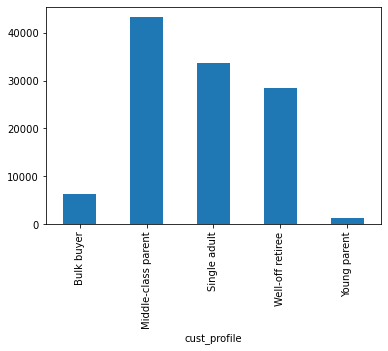

In [78]:
# Create bar chart to show distribution of profiles
df_non_low.groupby('cust_profile')['user_id'].nunique().plot.bar()

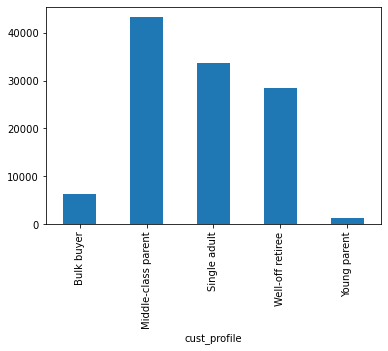

In [79]:
# Save bar chart to Jupyter
bar_profile = df_non_low.groupby('cust_profile')['user_id'].nunique().plot.bar()

In [80]:
# Export bar chart
bar_profile.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_profile.png'))

# 07. Aggregate variables on customer profile level

## 01. Aggregate variables for usage frequency

In [81]:
# Aggregate max, min, and mean variables of max_order, group by customer profiile
df_non_low.groupby('cust_profile').agg({'max_order': ['max', 'min', 'mean']})

max_order               
                          max min       mean
cust_profile                                
Bulk buyer                 99   5  38.529494
Middle-class parent        99   5  34.732065
Single adult               99   5  34.603354
Well-off retiree           99   5  34.420770
Young parent               99   5  38.901466

Young parents and bulk buyers have a higher average number of max orders. So it seems as though young parents and bulk buyers order more often than other customers.

## 02. Aggregate variables for expenditure

In [82]:
# Aggregate max, min, and mean variables of avg_price, group by customer profile
df_non_low.groupby('cust_profile').agg({'avg_price': ['max', 'min', 'mean']})

avg_price                    
                           max       min      mean
cust_profile                                      
Bulk buyer           10.988636  3.564286  7.562100
Middle-class parent  18.233333  1.000000  7.855556
Single adult         16.294737  1.000000  7.752228
Well-off retiree     19.400000  4.370588  7.955158
Young parent         10.200763  3.753846  7.638002

Well-off retirees, middle-class parents, and single adults have the highest maximum of average price, meaning at least one customer in each of these three profiles spends a lot more than anyone else. When it comes to the average of the average price for all profiles, well-off retirees and middle-class parents have the highest. Although the difference between the highest and lowest average is only 40 cents, that amount on multiple items on multiple orders on multiple users would add up to quite the large profit. However, we would need to perform a statistical test (like a t-test) to find out if the slight differences are statistically significant. If it was statistically significant, then we could say that well-off retirees spend more on average than other customer profiles.

# 08. Compare customer profiles across regions and departments

## 01. Compare customer profiles across regions

In [83]:
# Find proportions of customer profiles by region
df_non_low.groupby(['region', 'cust_profile'])['user_id'].nunique()

region     cust_profile       
Midwest    Bulk buyer              1455
           Middle-class parent    10124
           Single adult            7955
           Well-off retiree        6699
           Young parent             330
Northeast  Bulk buyer              1104
           Middle-class parent     7599
           Single adult            5936
           Well-off retiree        5013
           Young parent             222
South      Bulk buyer              2128
           Middle-class parent    14556
           Single adult           11168
           Well-off retiree        9500
           Young parent             468
West       Bulk buyer              1560
           Middle-class parent    10961
           Single adult            8583
           Well-off retiree        7263
           Young parent             348
Name: user_id, dtype: int64

In [84]:
# Look at aggregate max, min, mean, and median variables for avg_price, grouped by region and customer profile
df_non_low.groupby(['region', 'cust_profile']).agg({'avg_price': ['max', 'min', 'mean', 'median']})

avg_price                              
                                     max       min      mean    median
region    cust_profile                                                
Midwest   Bulk buyer           10.200000  4.100000  7.612924  7.725037
          Middle-class parent  15.706667  1.000000  7.868785  7.859565
          Single adult         14.600000  1.800000  7.762172  7.786610
          Well-off retiree     13.223077  6.113158  7.940393  7.887990
          Young parent         10.051613  3.753846  7.640171  7.721689
Northeast Bulk buyer           10.988636  4.572222  7.529719  7.626919
          Middle-class parent  18.233333  2.310000  7.837590  7.831280
          Single adult         15.800000  1.100000  7.742067  7.783036
          Well-off retiree     12.833333  4.433333  7.955916  7.885120
          Young parent         10.200763  4.559091  7.614757  7.643173
South     Bulk buyer           10.378977  3.609091  7.561098  7.655166
          Middle-class parent  15.000000  2.000000  7.855580  7.840704
          Single adult         14.761905  1.308333  7.758504  7.798205
          Well-off retiree     14.175000  6.310714  7.962262  7.906743
          Young parent         10.090769  5.346964  7.601230  7.626100
West      Bulk buyer           10.121667  3.564286  7.538430  7.678286
          Middle-class parent  14.100000  1.695238  7.855865  7.846203
          Single adult         16.294737  1.000000  7.741538  7.775076
          Well-off retiree     19.400000  4.370588  7.958920  7.909132
          Young parent          9.584043  5.190116  7.705243  7.795682

In [85]:
# Look at aggregate max, min, mean, and median variables for max_order, grouped by region and customer profile
df_non_low.groupby(['region', 'cust_profile']).agg({'max_order': ['max', 'min', 'mean', 'median']})

max_order                      
                                    max min       mean median
region    cust_profile                                       
Midwest   Bulk buyer                 99   5  39.541905     34
          Middle-class parent        99   5  34.370636     28
          Single adult               99   5  34.719960     28
          Well-off retiree           99   5  33.498456     27
          Young parent               99   5  38.527181     39
Northeast Bulk buyer                 99   5  37.663673     32
          Middle-class parent        99   5  35.181533     29
          Single adult               99   5  33.774278     27
          Well-off retiree           99   5  35.420285     29
          Young parent               99   5  33.218531     28
South     Bulk buyer                 99   5  37.197583     33
          Middle-class parent        99   5  34.889204     28
          Single adult               99   5  34.750282     28
          Well-off retiree           99   5  34.310990     27
          Young parent               99   5  41.933884     37
West      Bulk buyer                 99   5  39.879888     36
          Middle-class parent        99   5  34.543078     28
          Single adult               99   5  34.859718     28
          Well-off retiree           99   5  34.692917     28
          Young parent               99   5  38.329496     28

Young parents in the Midwest and the South have a very high median of max_orders. I want to create a bar chart of this.

In [86]:
# Create subset of only young parents
df_yp = df_non_low.loc[df_non_low['cust_profile'] == 'Young parent']

In [87]:
# Check that number of rows is correct
df_yp.shape

(18755, 35)

In [88]:
# Check output
df_yp.head(15)

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
53954,103955,8661,32,4,15,9.0,3858,24,0,2nd Foods Chicken & Gravy,92,18,2.3,Low-range product,Least busy,Least busy days,Most orders,37,Regular customer,8.073023,Low spender,8.0,Frequent customer,Carlos,Mccarthy,Male,South Dakota,19,3,living with parents and siblings,52855,both,Midwest,Non-low-activity customer,Young parent
54095,103955,8661,32,4,15,9.0,24011,25,0,2nd Foods - Beef & Beef Gravy,92,18,13.3,Mid-range product,Least busy,Least busy days,Most orders,37,Regular customer,8.073023,Low spender,8.0,Frequent customer,Carlos,Mccarthy,Male,South Dakota,19,3,living with parents and siblings,52855,both,Midwest,Non-low-activity customer,Young parent
54194,103955,8661,32,4,15,9.0,7512,26,0,2nd Foods Ham & Ham Gravy,92,18,8.6,Mid-range product,Least busy,Least busy days,Most orders,37,Regular customer,8.073023,Low spender,8.0,Frequent customer,Carlos,Mccarthy,Male,South Dakota,19,3,living with parents and siblings,52855,both,Midwest,Non-low-activity customer,Young parent
59589,994088,9938,5,5,12,12.0,18334,15,0,Baby Oil,102,18,9.4,Mid-range product,Regularly busy,Regularly busy,Most orders,25,Regular customer,6.962944,Low spender,10.0,Frequent customer,Sarah,Lu,Female,Texas,25,3,married,36574,both,South,Non-low-activity customer,Young parent
77569,513656,12743,1,1,13,NaN,22969,8,0,"Sweeet Potato, Apple, Carrot & Cinnamon Organi...",92,18,14.6,Mid-range product,Regularly busy,Busiest days,Most orders,14,Regular customer,8.606122,Low spender,20.0,Regular customer,Phyllis,Mercado,Female,Texas,20,1,living with parents and siblings,91019,both,South,Non-low-activity customer,Young parent
77570,3386415,12743,2,5,14,30.0,22969,2,1,"Sweeet Potato, Apple, Carrot & Cinnamon Organi...",92,18,14.6,Mid-range product,Regularly busy,Regularly busy,Most orders,14,Regular customer,8.606122,Low spender,20.0,Regular customer,Phyllis,Mercado,Female,Texas,20,1,living with parents and siblings,91019,both,South,Non-low-activity customer,Young parent
77571,283069,12743,4,5,19,7.0,22969,3,1,"Sweeet Potato, Apple, Carrot & Cinnamon Organi...",92,18,14.6,Mid-range product,Regularly busy,Regularly busy,Average orders,14,Regular customer,8.606122,Low spender,20.0,Regular customer,Phyllis,Mercado,Female,Texas,20,1,living with parents and siblings,91019,both,South,Non-low-activity customer,Young parent
77615,283069,12743,4,5,19,7.0,20979,4,0,Graduates Arrowroot Cookie 10+ Months,92,18,9.6,Mid-range product,Regularly busy,Regularly busy,Average orders,14,Regular customer,8.606122,Low spender,20.0,Regular customer,Phyllis,Mercado,Female,Texas,20,1,living with parents and siblings,91019,both,South,Non-low-activity customer,Young parent
77628,283069,12743,4,5,19,7.0,13883,2,0,Spill-Proof 6+ Months Sippy Cups,82,18,8.7,Mid-range product,Regularly busy,Regularly busy,Average orders,14,Regular customer,8.606122,Low spender,20.0,Regular customer,Phyllis,Mercado,Female,Texas,20,1,living with parents and siblings,91019,both,South,Non-low-activity customer,Young parent
98064,703917,17115,21,6,17,5.0,43875,3,0,Baby Food Stage 2 Blueberry Pear & Purple Carrot,92,18,6.5,Mid-range product,Regularly busy,Regularly busy,Most orders,43,Loyal customer,7.768475,Low spender,5.0,Frequent customer,Lillian,Meadows,Female,Ohio,20,1,living with parents and siblings,72255,both,Midwest,Non-low-activity customer,Young parent


In [89]:
# Look at aggregate median variable for max_order, grouped by region, of only df_yp
df_yp.groupby(['region', 'cust_profile']).agg({'max_order': ['median']})

,,max_order
,,median
region,cust_profile,
Midwest,Young parent,39
Northeast,Young parent,28
South,Young parent,37
West,Young parent,28


<AxesSubplot:xlabel='region'>

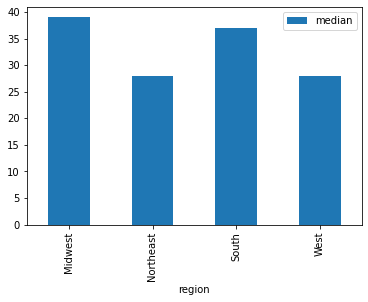

In [90]:
# Create bar chart of median max order, grouped by region, for only young parents
df_yp.groupby('region')['max_order'].agg(['median']).sort_index().plot.bar()

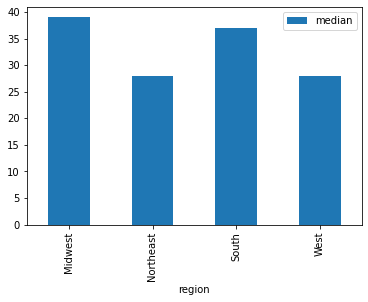

In [91]:
# Save bar chart to Jupyter
bar_med_yp = df_yp.groupby('region')['max_order'].agg(['median']).sort_index().plot.bar()

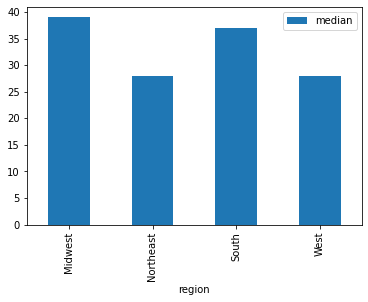

In [92]:
# Check output
bar_med_yp.figure

In [93]:
# Export bar chart
bar_med_yp.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'bar_median_max_orders_young_parents_by_region.png'))

## 02. Compare customer profiles across departments

In [94]:
# Find most common department for each customer profile by getting count of each department _id grouped by cust_profile
df_non_low.groupby(['cust_profile', 'department_id'])['department_id'].count()

cust_profile         department_id
Bulk buyer           10                 17817
Middle-class parent  1                 579032
                     2                   9150
                     3                 307343
                     4                2528768
                                       ...   
Well-off retiree     18                 76986
                     19                449325
                     20                187730
                     21                 11892
Young parent         18                 18755
Name: department_id, Length: 63, dtype: int64

In [95]:
# Change options to display all rows
pd.options.display.max_rows = None

In [96]:
# Rerun count from above
df_non_low.groupby(['cust_profile', 'department_id'])['department_id'].count()

cust_profile         department_id
Bulk buyer           10                 17817
Middle-class parent  1                 579032
                     2                   9150
                     3                 307343
                     4                2528768
                     5                  36806
                     6                  71312
                     7                 682426
                     8                  24103
                     9                 228482
                     10                  9709
                     11                115973
                     12                189715
                     13                492759
                     14                181691
                     15                281671
                     16               1439382
                     17                187504
                     18                115414
                     19                718694
                     20                275574

In [97]:
# Create subset of middle-class parents
df_midpar = df_non_low.loc[df_non_low['cust_profile'] == 'Middle-class parent']

In [98]:
# Check shape
df_midpar.shape

(8493301, 35)

In [99]:
# Check output
df_midpar.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
0,2539329,1,1,2,8,NaN,196,1,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
1,2398795,1,2,3,7,15.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
2,473747,1,3,3,12,21.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
3,2254736,1,4,4,7,29.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
4,431534,1,5,4,15,28.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent


In [100]:
# Find count of department_id for middle-class parents
df_midpar.groupby(['cust_profile', 'department_id'])['department_id'].count().sort_values(ascending = False)

cust_profile         department_id
Middle-class parent  4                2528768
                     16               1439382
                     19                718694
                     7                 682426
                     1                 579032
                     13                492759
                     3                 307343
                     15                281671
                     20                275574
                     9                 228482
                     12                189715
                     17                187504
                     14                181691
                     11                115973
                     18                115414
                     6                  71312
                     5                  36806
                     8                  24103
                     21                 17793
                     10                  9709
                     2                   9150

In [101]:
# Find out what department_id of 4
print(data_dict.get(4))

{'department': 'produce'}


In [102]:
# Find out what department_id of 16
print(data_dict.get(16))

{'department': 'dairy eggs'}


In [103]:
# Create subset of well-off retirees
df_well_ret = df_non_low.loc[df_non_low['cust_profile'] == 'Well-off retiree']

In [104]:
# Check shape
df_well_ret.shape

(5741763, 35)

In [105]:
# Check output
df_well_ret.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
335,1573906,21,10,3,10,6.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
336,3341737,21,33,1,12,30.0,49235,14,0,Organic Half & Half,53,16,1.8,Low-range product,Regularly busy,Busiest days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
337,1082944,21,14,1,9,10.0,47766,6,0,Organic Avocado,24,4,6.3,Mid-range product,Regularly busy,Busiest days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
338,774475,21,16,1,11,7.0,47766,4,1,Organic Avocado,24,4,6.3,Mid-range product,Regularly busy,Busiest days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree
339,77791,21,19,3,9,8.0,47766,13,1,Organic Avocado,24,4,6.3,Mid-range product,Regularly busy,Least busy days,Most orders,33,Regular customer,7.012683,Low spender,7.5,Frequent customer,Edward,Carr,Male,Montana,71,0,divorced/widowed,124643,both,West,Non-low-activity customer,Well-off retiree


In [106]:
# Find count of department_id for well_off retirees
df_well_ret.groupby(['cust_profile', 'department_id'])['department_id'].count().sort_values(ascending = False)

cust_profile      department_id
Well-off retiree  4                1719488
                  16                972729
                  7                 454001
                  19                449325
                  1                 399406
                  13                338609
                  3                 211418
                  15                195602
                  20                187730
                  9                 158994
                  12                136237
                  17                128236
                  14                118771
                  11                 77209
                  18                 76986
                  6                  48512
                  5                  25756
                  8                  18625
                  21                 11892
                  2                   6312
                  10                  5925
Name: department_id, dtype: int64

In [107]:
# Create subset of single adults
df_single_ad = df_non_low.loc[df_non_low['cust_profile'] == 'Single adult']

In [108]:
# Check shape
df_single_ad.shape

(6227792, 35)

In [109]:
# Check output
df_single_ad.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
59,2968173,15,15,1,9,7.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
60,1870022,15,17,2,16,8.0,196,6,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
61,1911383,15,18,2,11,7.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Regularly busy,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
62,2715276,15,21,1,9,7.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult
63,487368,15,22,1,10,14.0,196,1,1,Soda,77,7,9.0,Mid-range product,Regularly busy,Busiest days,Most orders,22,Regular customer,3.980556,Low spender,10.0,Frequent customer,Janet,Woodard,Female,Indiana,69,0,divorced/widowed,54313,both,Midwest,Non-low-activity customer,Single adult


In [110]:
# Find count of department_id for single adults
df_single_ad.groupby(['cust_profile', 'department_id'])['department_id'].count().sort_values(ascending = False)

cust_profile  department_id
Single adult  4                1846215
              16               1055127
              19                578505
              7                 532676
              1                 430084
              13                360180
              3                 229662
              20                206998
              15                204014
              9                 165604
              17                140179
              14                137383
              12                132669
              11                 86745
              6                  52356
              5                  30288
              8                  18581
              21                 13315
              2                   7211
Name: department_id, dtype: int64

Products from the produce and dairy/eggs departments are far and wide the most common purchases for middle-class parents, well-off retirees, and single adults.

In [111]:
# Find proportion of products purchased by department_id, grouped by region, for middle-class parents
df_midpar.groupby('region')['department_id'].value_counts(normalize = True)

region     department_id
Midwest    4                0.297277
           16               0.169955
           19               0.083884
           7                0.080452
           1                0.069117
           13               0.058075
           3                0.035594
           15               0.033499
           20               0.032747
           9                0.026722
           17               0.022490
           12               0.022472
           14               0.020856
           11               0.013564
           18               0.013402
           6                0.008673
           5                0.004109
           8                0.002768
           21               0.002168
           10               0.001132
           2                0.001045
Northeast  4                0.297330
           16               0.169112
           19               0.087057
           7                0.081483
           1                0.067807
           13

In [112]:
# Find proportion of products purchased by department_id, grouped by region, for well-off retirees
df_well_ret.groupby('region')['department_id'].value_counts(normalize = True)

region     department_id
Midwest    4                0.301146
           16               0.168793
           7                0.079507
           19               0.077767
           1                0.069106
           13               0.059464
           3                0.036318
           15               0.033812
           20               0.032682
           9                0.027417
           12               0.023237
           17               0.022466
           14               0.020995
           11               0.013557
           18               0.013063
           6                0.008537
           5                0.004939
           8                0.002837
           21               0.002112
           2                0.001134
           10               0.001110
Northeast  4                0.297929
           16               0.170607
           7                0.080341
           19               0.079237
           1                0.068361
           13

In [113]:
# Find proportion of products purchased by department_id, grouped by region, for single adults
df_single_ad.groupby('region')['department_id'].value_counts(normalize = True)

region     department_id
Midwest    4                0.296435
           16               0.170506
           19               0.092124
           7                0.083762
           1                0.068759
           13               0.057996
           3                0.037096
           15               0.032770
           20               0.032403
           9                0.027310
           17               0.023165
           14               0.022037
           12               0.021860
           11               0.013926
           6                0.008380
           5                0.005141
           8                0.003076
           21               0.002177
           2                0.001077
Northeast  4                0.294064
           16               0.168599
           19               0.092460
           7                0.086970
           1                0.068849
           13               0.058041
           3                0.037631
           20

In [117]:
# Create subset of department_id = 4 (produce)
df_produce = df_non_low.loc[df_non_low['department_id'] == 4]

In [118]:
# Check shape
df_produce.shape

(9079273, 35)

In [119]:
# Check output
df_produce.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
34,2398795,1,2,3,7,15.0,13176,4,0,Bag of Organic Bananas,24,4,10.3,Mid-range product,Regularly busy,Least busy days,Average orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
35,431534,1,5,4,15,28.0,13176,8,1,Bag of Organic Bananas,24,4,10.3,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
48,431534,1,5,4,15,28.0,10326,5,0,Organic Fuji Apples,24,4,2.7,Low-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
49,431534,1,5,4,15,28.0,17122,6,0,Honeycrisp Apples,24,4,14.0,Mid-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent
50,431534,1,5,4,15,28.0,41787,7,0,Bartlett Pears,24,4,5.0,Low-range product,Least busy,Least busy days,Most orders,10,New customer,6.367797,Low spender,20.5,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,3,married,40423,both,South,Non-low-activity customer,Middle-class parent


In [121]:
# Find proportions of produce purchased by customer profile
df_produce.groupby(['cust_profile'])['user_id'].nunique()

cust_profile
Middle-class parent    41484
Single adult           31902
Well-off retiree       27530
Name: user_id, dtype: int64

<AxesSubplot:ylabel='user_id'>

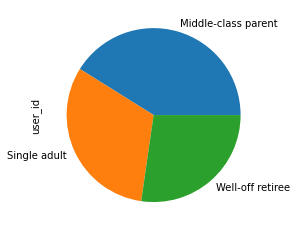

In [122]:
# Create pie chart of the above
df_produce.groupby(['cust_profile'])['user_id'].nunique().plot.pie()

<AxesSubplot:ylabel='user_id'>

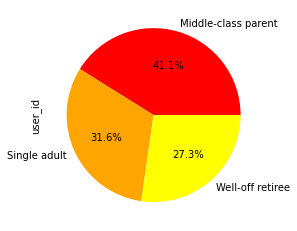

In [123]:
# Try to make pie chart with labels

df_produce.groupby(['cust_profile'])['user_id'].nunique().plot.pie(colors = ('red', 'orange', 'yellow'), autopct='%1.1f%%')


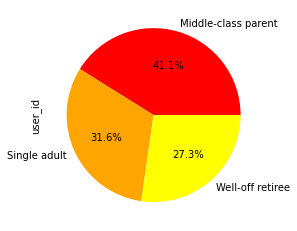

In [126]:
#Save pie chart to Jupyter

pie_produce = df_produce.groupby(['cust_profile'])['user_id'].nunique().plot.pie(colors = ('red', 'orange', 'yellow'), autopct='%1.1f%%')

In [127]:
# Export pie chart
pie_produce.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'pie_produce_by_profile.png'))

# 09. Determine which region has more loyal customers/high spenders/frequent customers

In [128]:
# Create subset of loyal customers, high spenders, and frequent customers
df_best_cust = df_non_low.loc[(df_non_low['loyalty_flag'] == 'Loyal customer') & (df_non_low['spending_flag'] == 'High spender')& (df_non_low['order_frequency_flag'] == 'Frequent customer')]

In [129]:
# Check shape
df_best_cust.shape

(13896, 35)

In [130]:
# Check output
df_best_cust.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,prices,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,avg_price,spending_flag,median_days_since_prior_order,order_frequency_flag,first_name,last_name,gender,state,age,num_dependents,family_status,income,_merge,region,low_activity_flag,cust_profile
6064,1155987,1024,33,3,9,1.0,196,2,0,Soda,77,7,9.0,Mid-range product,Regularly busy,Least busy days,Most orders,99,Loyal customer,11.073529,High spender,1.0,Frequent customer,Lawrence,Lowery,Male,Arkansas,52,0,single,100515,both,South,Non-low-activity customer,Single adult
6065,1623443,1024,45,4,15,1.0,196,1,1,Soda,77,7,9.0,Mid-range product,Least busy,Least busy days,Most orders,99,Loyal customer,11.073529,High spender,1.0,Frequent customer,Lawrence,Lowery,Male,Arkansas,52,0,single,100515,both,South,Non-low-activity customer,Single adult
6066,3043789,1024,50,1,9,1.0,4920,1,0,Seedless Red Grapes,123,4,1.1,Low-range product,Regularly busy,Busiest days,Most orders,99,Loyal customer,11.073529,High spender,1.0,Frequent customer,Lawrence,Lowery,Male,Arkansas,52,0,single,100515,both,South,Non-low-activity customer,Single adult
6067,989432,1024,66,1,14,0.0,4920,2,1,Seedless Red Grapes,123,4,1.1,Low-range product,Regularly busy,Busiest days,Most orders,99,Loyal customer,11.073529,High spender,1.0,Frequent customer,Lawrence,Lowery,Male,Arkansas,52,0,single,100515,both,South,Non-low-activity customer,Single adult
6068,2300656,1024,21,0,12,0.0,5769,1,0,Organic Chicken Stock,69,15,1.2,Low-range product,Busiest day,Busiest days,Most orders,99,Loyal customer,11.073529,High spender,1.0,Frequent customer,Lawrence,Lowery,Male,Arkansas,52,0,single,100515,both,South,Non-low-activity customer,Single adult


In [131]:
# Find proportion of best customers by region
df_best_cust.groupby(['region'])['user_id'].nunique()

region
Midwest      14
Northeast    11
South        26
West         18
Name: user_id, dtype: int64

In [132]:
# Try to turn into proportions
(df_best_cust.groupby(['region'])['user_id'].nunique() / df_best_cust.groupby(['region'])['user_id'].nunique().sum())

region
Midwest      0.202899
Northeast    0.159420
South        0.376812
West         0.260870
Name: user_id, dtype: float64

<AxesSubplot:ylabel='region'>

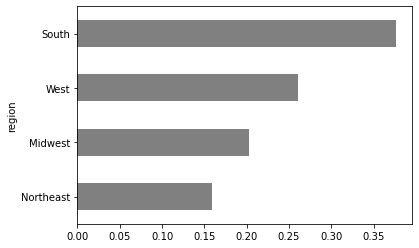

In [140]:
# Create horizontal bar chart of the above
(df_best_cust.groupby(['region'])['user_id'].nunique() / df_best_cust.groupby(['region'])['user_id'].nunique().sum()).sort_values(ascending = True).plot.barh(color = ('gray'))

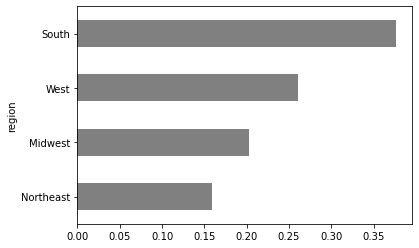

In [141]:
# Save horizontal bar chart to Jupyter
barh_best_cust = (df_best_cust.groupby(['region'])['user_id'].nunique() / df_best_cust.groupby(['region'])['user_id'].nunique().sum()).sort_values(ascending = True).plot.barh(color = ('gray'))

In [142]:
# Export chart
barh_best_cust.figure.savefig(os.path.join(path, '04 Analysis', 'Visualizations', 'barh_best_cust_by_region.png'))

# 10. Export final data set

In [143]:
# Export final data set
df_non_low.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))